Ben Kahan  
DS 210  
Homework 4. 
12 October 2022  
Collaborators: None

# Question 1

For standard `*.txt` files, I use `vim` or `nano` to edit them. However, for `Rust`, I will be using Intellij with the `Rust` plugin.  

For version control, I use `git` and GitHub to store my private repositories. 

For example: 

```bash
git init 
mkdir "homework4"
git add homework4/
git commit -m "hw4 dir initial"
cd homework4/ 
vim example.txt # edit the file using vim commands
git add example.txt 
git commit -m "example.txt initial"
git push origin main 
```

In [2]:
%%bash 
rustc --version

rustc 1.64.0 (a55dd71d5 2022-09-19)


In [3]:
%%bash 
cargo --version

cargo 1.64.0 (387270bc7 2022-09-16)


For Jupyter, I installed the Rust Jupyter kernel from Google

# Question 2

In [53]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [112]:
A,B = 0,1
domain = [0,1]
samples = 50
x = np.sort(np.random.rand(1,samples).ravel())

In [113]:
def mse(x): 
    return np.square(x[0] - x[1]).mean()

def mae(x): 
    return np.abs(x[0] - x[1])

# Question 4

In [305]:
def f(x):
    return (np.random.rand()*np.float_power(x,13) + \
            np.random.rand()*np.float_power(x,-.5) + \
            np.random.rand()* np.cos(x) - \
            .5 * np.random.rand() * \
            np.random.normal(size=samples) \
            ).ravel()

In [306]:
y = f(x)

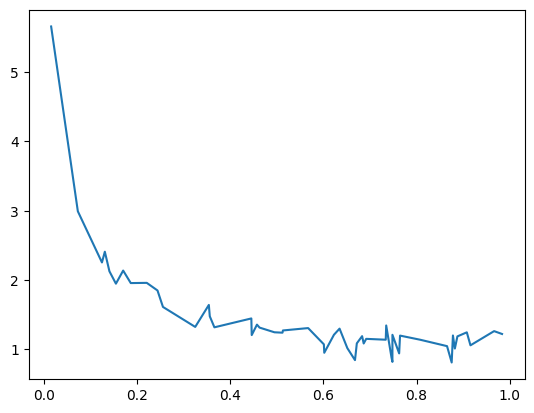

In [307]:
plt.plot(x,y)

In [308]:
def eval_poly(c,x):
    y = np.zeros_like(x)
# What does this inner loop do? 
# ANS: This innerloop indexes for every entry in c
# since c, in this context, is the result of numpy.polyfit(),
# the method returns a numpy array with the indicies representing
# the coefficients of the fit polynomial 
# thus, the for loop separates each coefficient and: 
# y = y*x, multiplies itself (y) by x and adds the coefficient 
# y is an empty array (declared above to alloc mem) 
# y is then returned which contains the modified entries of the new polynomial
    for coeff in c:
        y = y * x + coeff
    return y

In [325]:
over = np.polyfit(x,y,17)
over_res = eval_poly(over,x)
under = np.polyfit(x,y,2)
under_res = eval_poly(under,x)

<Figure size 300x500 with 0 Axes>

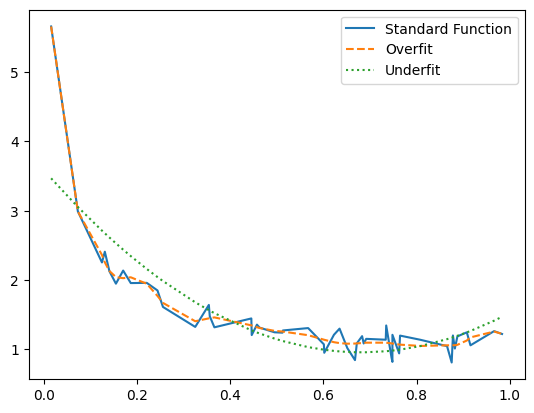

<Figure size 300x500 with 0 Axes>

In [328]:
plt.plot(x,y, label="Standard Function")
plt.plot(x, over_res, label="Overfit", linestyle="--")
plt.plot(x, under_res, label="Underfit", linestyle=":")
plt.legend()
plt.figure(figsize=(3,5))

In [329]:
underfit_var = np.var(under_res)
overfit_var = np.var(over_res)

In [330]:
def mse(x,y):
    return ((x-y)**2).mean()

In [331]:
underfit_mse = mse(x, under_res)
overfit_mse = mse(x, over_res) 

In [338]:
underfit_var, underfit_mse

(0.407243215287553, 1.5638867829213317)

In [339]:
overfit_var, overfit_mse

(0.5408923912150262, 1.6975337442989888)

We see that the underfitting leads to lower variance (which is expected) and we see greater bias through the mean squared error estimator of the overfit polynomial. 